# Explore here

In [ ]:
!kaggle competitions download -c DontGetKicked

In [9]:
import zipfile

# Define the path to your zip file
zip_path = '/workspaces/Isabell-Joane-Eric-Final-Project/src/DontGetKicked.zip'

# Define the directory where you want to extract the contents
extract_to = '/workspaces/Isabell-Joane-Eric-Final-Project/data/processed'

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents into the directory
    zip_ref.extractall(extract_to)


In [2]:
import pandas as pd

# Path to the CSV file
file_path = '/workspaces/Isabell-Joane-Eric-Final-Project/data/processed/training.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

   RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge   Make  \
0      1         0  12/7/2009   ADESA     2006           3  MAZDA   
1      2         0  12/7/2009   ADESA     2004           5  DODGE   
2      3         0  12/7/2009   ADESA     2005           4  DODGE   
3      4         0  12/7/2009   ADESA     2004           5  DODGE   
4      5         0  12/7/2009   ADESA     2005           4   FORD   

                 Model Trim           SubModel  ...  \
0               MAZDA3    i         4D SEDAN I  ...   
1  1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT  ...   
2           STRATUS V6  SXT   4D SEDAN SXT FFV  ...   
3                 NEON  SXT           4D SEDAN  ...   
4                FOCUS  ZX3       2D COUPE ZX3  ...   

  MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT AUCGUART  \
0                      11597.0                    12409.0        NaN      NaN   
1                      11374.0                    12791.0        NaN      NaN   
2          

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
print(df.isnull().sum())

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [5]:
df.nunique()

RefId                                72983
IsBadBuy                                 2
PurchDate                              517
Auction                                  3
VehYear                                 10
VehicleAge                              10
Make                                    33
Model                                 1063
Trim                                   134
SubModel                               863
Color                                   16
Transmission                             3
WheelTypeID                              4
WheelType                                3
VehOdo                               39947
Nationality                              4
Size                                    12
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice    10342
MMRAcquisitionAuctionCleanPrice      11379
MMRAcquisitionRetailAveragePrice     12725
MMRAcquisitonRetailCleanPrice        13456
MMRCurrentAuctionAveragePrice        10315
MMRCurrentA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

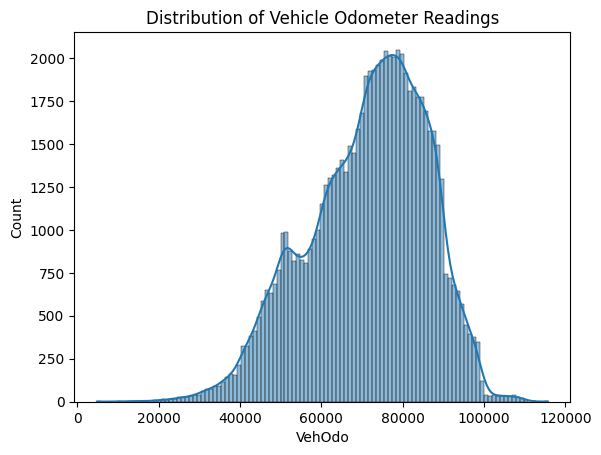

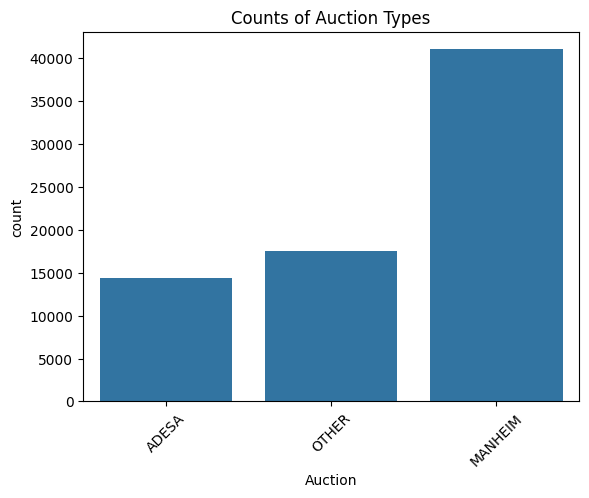

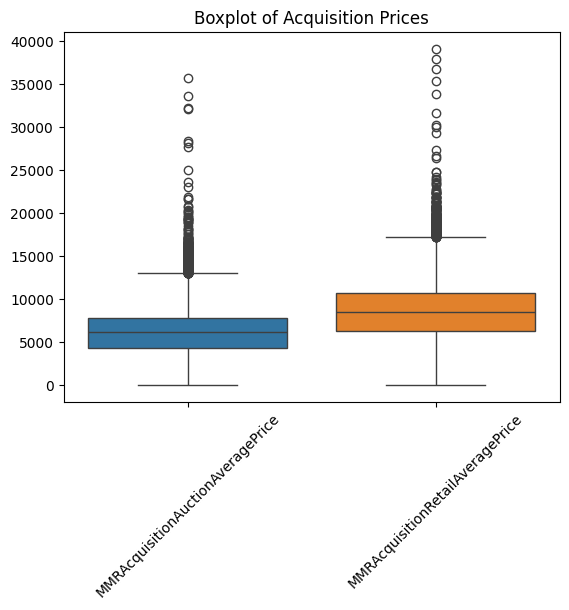

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numerical variable
sns.histplot(df['VehOdo'], kde=True)
plt.title('Distribution of Vehicle Odometer Readings')
plt.show()

# Bar plot for a categorical variable with reasonable cardinality
sns.countplot(x='Auction', data=df)
plt.title('Counts of Auction Types')
plt.xticks(rotation=45)
plt.show()

# Boxplot for prices to check for outliers
sns.boxplot(data=df[['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice']])
plt.title('Boxplot of Acquisition Prices')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Drop the 'PRIMEUNIT' and 'AUCGUART' columns from the DataFrame
df = df.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

In [9]:
# Filling missing values for categorical columns with high or reasonable cardinality
categorical_columns = ['Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName']

for column in categorical_columns:
    if df[column].nunique() < 100:  # Reasonable cardinality
        most_frequent_value = df[column].mode()[0]
        df[column] = df[column].fillna(most_frequent_value)
    else:  # High cardinality
        df[column] = df[column].fillna('Unknown')  # Preserving data integrity by acknowledging unknowns

In [10]:
# Filling missing values for numerical columns and treating WheelTypeID as categorical
numerical_and_categorical_ids = ['WheelTypeID',
                                 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                                 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                                 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                                 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

for column in numerical_and_categorical_ids:
    if df[column].dtype == 'float64':  # Numerical data
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)
    else:  # Categorical ID
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

In [11]:
print(df.isnull().sum())

RefId                                0
IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPric

In [12]:
# Convert PurchDate to datetime
df['PurchDate'] = pd.to_datetime(df['PurchDate'])

In [13]:
# Convert WheelTypeID to 'category' after handling missing values
df['WheelTypeID'] = df['WheelTypeID'].astype('category')